**Import Libraries**

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import copy

**Define Functions**

In [110]:
def number_game_simple_init(N, interval_prior, math_prior):

	if abs((interval_prior + math_prior) - 1) > 0.05:
	  raise ValueError('Sum of interval prior and math prior should be 1!')

	# Generate interval concepts of small and medium length
	hypotheses = np.zeros((0, N))
	vals = np.arange(N) + 1

	for size in np.arange(0, 50):
		for start in np.arange(N-size):
			end = start + size
			interval = np.zeros(N)
			interval[start:end+1] = 1
			hypotheses = np.vstack([hypotheses, interval])

	last_interval_concept = hypotheses.shape[0]

	# Put in odds
	#concept = np.equal(np.mod(vals, 2), 1).astype(int)
	#hypotheses = np.vstack([hypotheses, concept])

	# Put in multiples of 2 to 10
	#for base in np.arange(2,11):
	#	concept = np.equal(np.mod(vals, base), 0).astype(int)
	#	hypotheses = np.vstack([hypotheses, concept])

	last_hypothesis = hypotheses.shape[0]

	# Compute prior probabilities
	priors = np.empty(last_hypothesis)
	priors[:last_interval_concept] = interval_prior/last_interval_concept
	#priors[last_interval_concept:] = math_prior/(last_hypothesis-last_interval_concept)

	return hypotheses, priors


def number_game_likelihood(hypothesis, data):
    """
		hypothesis is a logical (0 or 1) vector on N elements, where
		hypothesis[i] = 1 iff i is contained in the extension of the
		concept represented by hypothesis.

		data is, similarly, a logical vector where data[i] = 1 iff
		i is contained in the observed dataset.

		note that length(hypothesis) == length(data) unless the caller
		of this procedure messed up

		TODO: first check if data is consistent with the given hypothesis.

		if it isn't, P(D|H) = 0.

		TODO: under strong sampling WITH REPLACEMENT, every consistent hypothesis
		assigns probability 1/(#options) to each data draw.
	"""
    for i in range(len(data)):
        if data[i] == 1:
            if hypothesis[i] == 0:
                return np.log(0)
    
    likelihood = (1 / sum(hypothesis))**(sum(data))
    log_likelihood = np.log(likelihood)

    return log_likelihood

def number_game_plot_predictions(hypotheses, priors, data):
	"""
		hypotheses = a matrix whose columns are particular hypotheses,
		represented as logical vectors reflecting datapoint membership

		priors = a vector of prior probabilities for each hypothesis

		data = a vector of observed numbers
	"""
	def numbers_to_logical(data):
		if np.isscalar(data): data = [data]
		logical_data = np.zeros(N)
		for datum in data:
			logical_data[datum-1] = 1
		return logical_data

	hyps, N = hypotheses.shape
	logical_data = numbers_to_logical(data)

	# Compute the posterior for every hypothesis
	posteriors = np.zeros(hyps)

	for h in np.arange(hyps):
		log_joint = np.log(priors[h]) + number_game_likelihood(hypotheses[h,:], logical_data)
		joint = np.exp(log_joint)
		posteriors[h] = joint

	posteriors /= np.sum(posteriors)

	# Compute the predictive contribution for each
	# hypothesis and add it in to the predictive

	predictive = np.dot(posteriors, hypotheses)

	# Plot it as a bar chart, also plot human data (if available)
	# and the top 6 hypotheses in decreasing order of posterior
	# probability

	fig, ax = plt.subplots(6,1, figsize=(7, 7))
	fig.subplots_adjust(top=0.95, bottom=0.05, hspace=0.85, left=0.05, right=0.95)


	ax[0].bar(np.arange(N)+1.0, predictive, 0.5, color='k')
	if np.isscalar(data): data = [data]
	ax[0].set_xlim([-0.5, (N+1)+0.5])
	ax[0].set_ylim([-0.05, 1.05])

	plt.show()

**Project Experiments**

In [157]:
# Define priors
N = 100 # In $10mn, i.e., total of $5bn budget
interval_prior = 0.95
math_prior = 0.05

# Data of 15 participants for 4 different anchors
data0 = [10, 0, 5, 10, 50, 10, 10, 50, 50, 0, 10, 0, 2, 10, 10] # Budget
data1 = [20, 0, 10, 20, 50, 15, 5, 50, 50, 15, 10, 0, 2, 10, 10] # Type of disaster
data2 = [50, 0, 10, 30, 70, 15, 5, 100, 100, 20, 15, 1, 2, 30, 10] # Infrastructure
data3 = [20, 0, 10, 30, 50, 15, 0, 50, 40, 8, 12, 1, 2, 10, 10] # Human loss

anchor0 = [15]
anchor1 = [15, 18]
anchor2 = [15, 18, 31]
anchor3 = [15, 18, 31, 17]

<ipython-input-110-6d646ad080ff>:60: RuntimeWarning: divide by zero encountered in log
  return np.log(0)


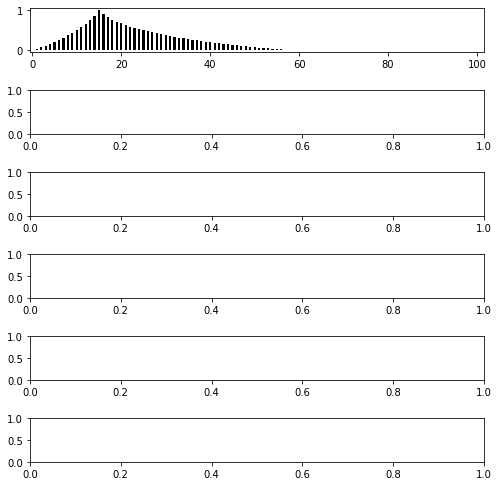

In [158]:
# Experiment for data0 (prior to information, only budget known)
hypotheses, priors = number_game_simple_init(N, interval_prior, math_prior)
number_game_plot_predictions(hypotheses, priors, anchor0)

<ipython-input-110-6d646ad080ff>:60: RuntimeWarning: divide by zero encountered in log
  return np.log(0)


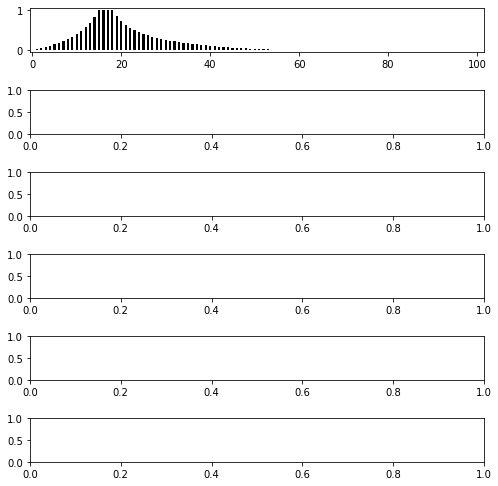

In [137]:
# Experiment for data1 (type of disaster)
hypotheses, priors = number_game_simple_init(N, interval_prior, math_prior)
number_game_plot_predictions(hypotheses, priors, anchor1)

<ipython-input-110-6d646ad080ff>:60: RuntimeWarning: divide by zero encountered in log
  return np.log(0)


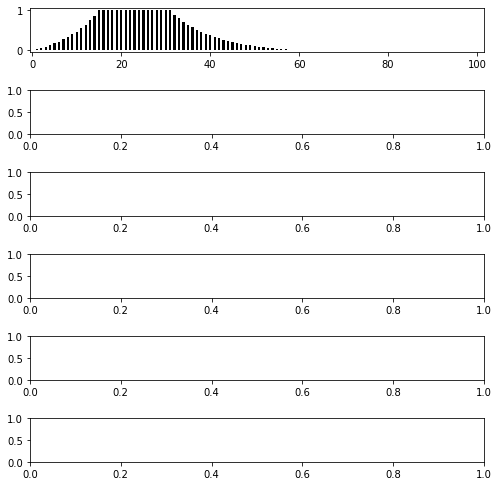

In [138]:
# Experiment for data2 (severity of infrastructural destruction)
hypotheses, priors = number_game_simple_init(N, interval_prior, math_prior)
number_game_plot_predictions(hypotheses, priors, anchor2)

<ipython-input-110-6d646ad080ff>:60: RuntimeWarning: divide by zero encountered in log
  return np.log(0)


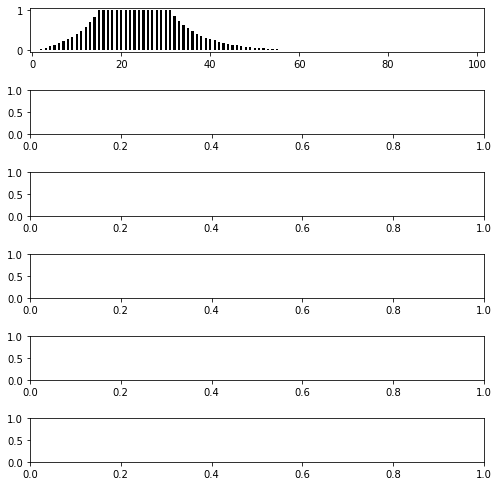

In [139]:
# Experiment for data3 (severity of human loss)
hypotheses, priors = number_game_simple_init(N, interval_prior, math_prior)
number_game_plot_predictions(hypotheses, priors, anchor3)

**Extensions through bootstrapping if necessary**

In [150]:
# Bootstrapping
data0_v2 = copy.deepcopy(data0)
data1_v2 = copy.deepcopy(data1)
data2_v2 = copy.deepcopy(data2)
data3_v2 = copy.deepcopy(data3)

# data0
for _ in range(35):
    x = np.random.choice(data0, size = 100, replace = True)
    data0_v2.append(round(x.mean()))

# data1
for _ in range(35):
    x = np.random.choice(data1, size = 100, replace = True)
    data1_v2.append(round(x.mean()))

# data2
for _ in range(35):
    x = np.random.choice(data2, size = 100, replace = True)
    data2_v2.append(round(x.mean()))

# data3
for _ in range(35):
    x = np.random.choice(data3, size = 100, replace = True)
    data3_v2.append(round(x.mean()))

# Check
print(data0_v2)
print(data1_v2)
print(data2_v2)
print(data3_v2)

[10, 1, 5, 10, 50, 10, 10, 50, 50, 1, 10, 1, 2, 10, 10, 13, 19, 15, 12, 17, 16, 17, 14, 16, 12, 16, 18, 14, 18, 12, 15, 13, 13, 14, 15, 16, 16, 16, 13, 18, 19, 15, 14, 17, 14, 18, 15, 12, 17, 15]
[20, 1, 10, 20, 50, 15, 5, 50, 50, 15, 10, 1, 2, 10, 10, 21, 18, 18, 18, 17, 18, 16, 19, 17, 19, 17, 17, 19, 17, 19, 19, 19, 18, 17, 20, 17, 19, 18, 19, 16, 21, 17, 19, 17, 20, 19, 18, 19, 16, 16]
[50, 1, 10, 30, 70, 15, 5, 100, 100, 20, 15, 1, 2, 30, 10, 31, 30, 33, 31, 26, 30, 32, 27, 33, 27, 28, 23, 29, 30, 27, 32, 23, 31, 32, 37, 25, 25, 32, 32, 32, 29, 40, 33, 40, 25, 36, 36, 27, 30, 33]
[20, 1, 10, 30, 50, 15, 1, 50, 40, 8, 12, 1, 2, 10, 10, 19, 20, 19, 17, 14, 17, 18, 17, 17, 18, 19, 17, 16, 19, 17, 16, 15, 18, 17, 16, 20, 18, 15, 12, 16, 16, 19, 17, 18, 17, 15, 16, 17, 21, 16]
